# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

In [6]:
type(cities)
cities

['kodinsk',
 'pahrump',
 'hermanus',
 'rio tinto',
 'grytviken',
 'adamstown',
 'bethel',
 'hovd',
 'puerto natales',
 'tiksi',
 'brindisi',
 'rongelap',
 'tolanaro',
 'albany',
 'malango',
 'yarmouth',
 'isafjordur',
 'turkmenbasy',
 'blackmans bay',
 'waitangi',
 'zaozersk',
 'ushuaia',
 'port elizabeth',
 'howard springs',
 'xining',
 'liptovsky hradok',
 'port mathurin',
 'port-aux-francais',
 'al jawf',
 'vorgashor',
 'darwin',
 'atafu village',
 'piriapolis',
 'al bawiti',
 'wewak',
 'anloga',
 'chorbane',
 'thompson',
 'meadow lake',
 'iwanai',
 'olonkinbyen',
 'papatowai',
 'bonga',
 'msaken',
 'samoylovka',
 'itoman',
 'edinburgh of the seven seas',
 'stanley',
 'taiohae',
 'oliveira dos brejinhos',
 'miri',
 'la reforma',
 'mossel bay',
 'bredasdorp',
 'egilsstadir',
 'antofagasta',
 'rio grande',
 'hadibu',
 'tsiombe',
 'san luis de la loma',
 'petropavlovsk-kamchatsky',
 'altai',
 'tindouf',
 'dwarka',
 'wedgefield',
 'georgetown',
 'morondava',
 'gemena',
 'cairns city',
 

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
import requests
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    params = {
    'appid':weather_api_key,
    'q': city,
    'units':unit
    }

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    response = requests.get(url, params=params).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

      # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather =

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodinsk
Processing Record 2 of Set 1 | pahrump
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | rio tinto
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | hovd
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | brindisi
Processing Record 12 of Set 1 | rongelap
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | malango
Processing Record 16 of Set 1 | yarmouth
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | turkmenbasy
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | zaozersk
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | port elizab

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodinsk,58.6881,99.1844,-26.42,100,95,0.25,RU,1708890852
1,pahrump,36.2083,-115.9839,19.03,35,100,0.89,US,1708890792
2,hermanus,-34.4187,19.2345,17.15,64,5,3.31,ZA,1708890852
3,rio tinto,41.1826,-8.5581,13.77,90,75,5.81,PT,1708890852
4,grytviken,-54.2811,-36.5092,4.32,94,100,5.52,GS,1708890852


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodinsk,58.6881,99.1844,-26.42,100,95,0.25,RU,1708890852
1,pahrump,36.2083,-115.9839,19.03,35,100,0.89,US,1708890792
2,hermanus,-34.4187,19.2345,17.15,64,5,3.31,ZA,1708890852
3,rio tinto,41.1826,-8.5581,13.77,90,75,5.81,PT,1708890852
4,grytviken,-54.2811,-36.5092,4.32,94,100,5.52,GS,1708890852


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

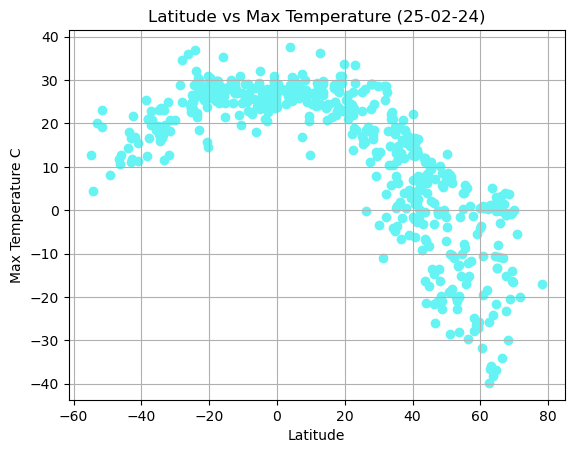

In [93]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],color='#66F3F3',)
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvsmaxtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

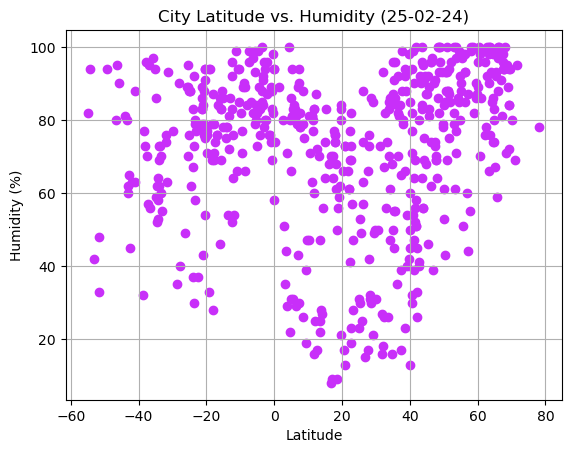

In [94]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],color="#C82FF9")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (25-02-24)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/latvshum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

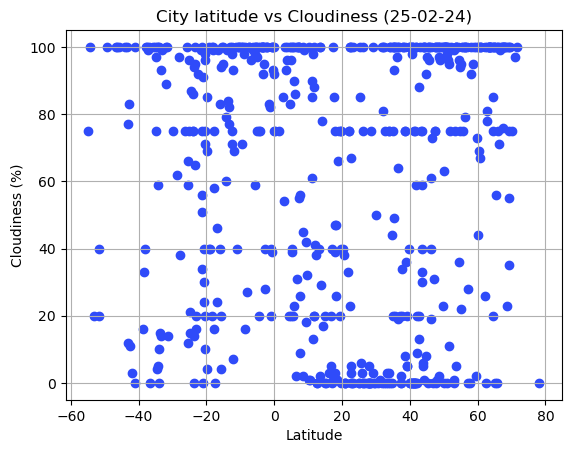

In [95]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],color='#2F4BF9',)
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvscloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

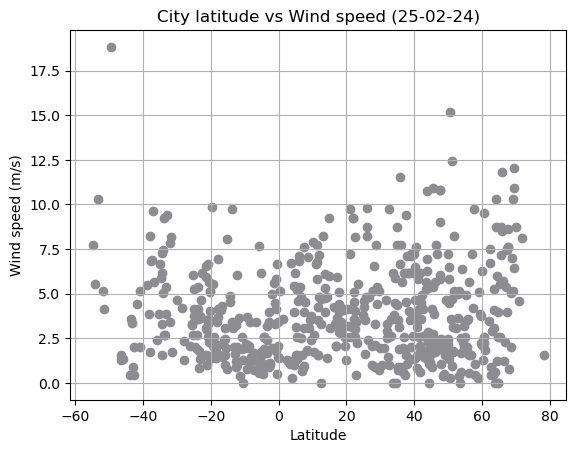

In [92]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],color='#8D8D90',)
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvswind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodinsk,58.6881,99.1844,-26.42,100,95,0.25,RU,1708890852
1,pahrump,36.2083,-115.9839,19.03,35,100,0.89,US,1708890792
3,rio tinto,41.1826,-8.5581,13.77,90,75,5.81,PT,1708890852
6,bethel,41.3712,-73.4140,4.54,39,0,2.57,US,1708890853
7,hovd,48.0056,91.6419,-16.21,64,1,1.05,MN,1708890853


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hermanus,-34.4187,19.2345,17.15,64,5,3.31,ZA,1708890852
4,grytviken,-54.2811,-36.5092,4.32,94,100,5.52,GS,1708890852
5,adamstown,-25.0660,-130.1015,26.46,76,96,5.27,PN,1708890853
8,puerto natales,-51.7236,-72.4875,19.25,48,40,5.14,CL,1708890853
12,tolanaro,-25.0319,46.9987,25.04,88,75,4.12,MG,1708890854


###  Temperature vs. Latitude Linear Regression Plot

## Northern Hemisphere: Max Temperature vs Latitude (Linear Regression)

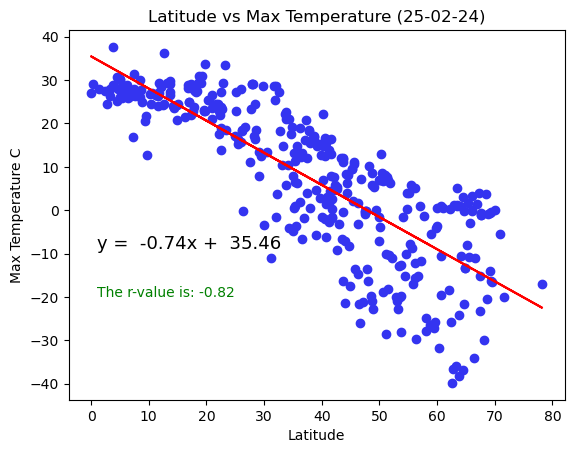

In [96]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#3434F0')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(1,-9), fontsize=13, color="black")
plt.text(1,-20,f'The r-value is: {round(rvalue,2)}',color= 'green')
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvstemplrnh.png")

# Show plot
plt.show()

## Southern Hemisphere: Max Temperature vs Latitude (Linear Regression)

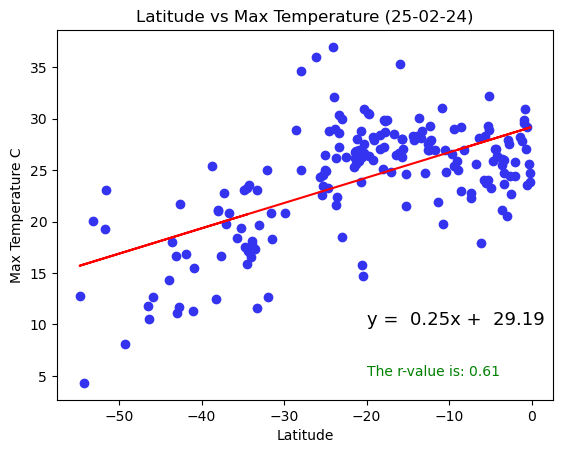

In [97]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#3434F0')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(-20,10), fontsize=13, color="black")
plt.text(-20,5,f'The r-value is: {round(rvalue,2)}',color= 'green')
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvstemplrst.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** We can see a direct relation between Lat and Temp, in both cases, nearest to the cero Latitud.. Higher Temperature.

###  Northern Humidity vs. Latitude Linear Regression Plot

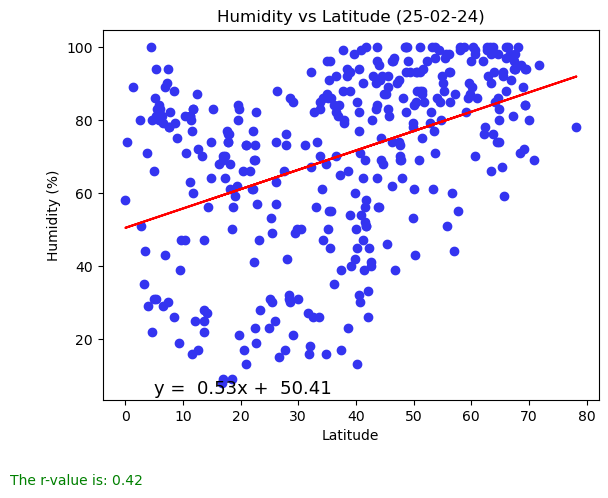

In [99]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#3434F0')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(5,5), fontsize=13, color="black")
plt.text(-20,-20,f'The r-value is: {round(rvalue,2)}',color= 'green')
# Incorporate the other graph properties
plt.title('Humidity vs Latitude (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvshumlrnh.png")

# Show plot
plt.show()

###  Southhern Humidity vs. Latitude Linear Regression Plot

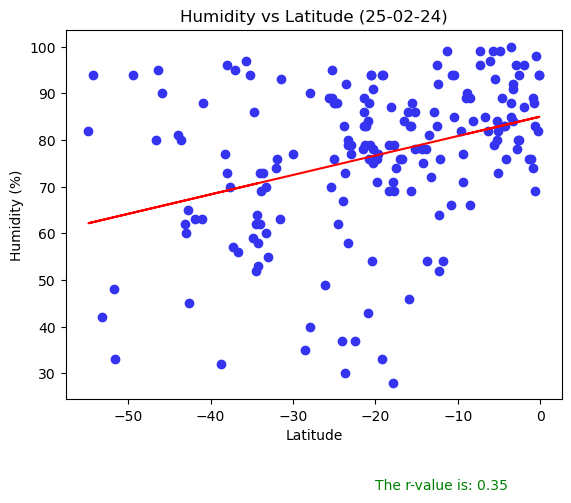

In [100]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#3434F0')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(-20,10), fontsize=13, color="black")
plt.text(-20,5,f'The r-value is: {round(rvalue,2)}',color= 'green')
# Incorporate the other graph properties
plt.title('Humidity vs Latitude (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvshumlrst.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

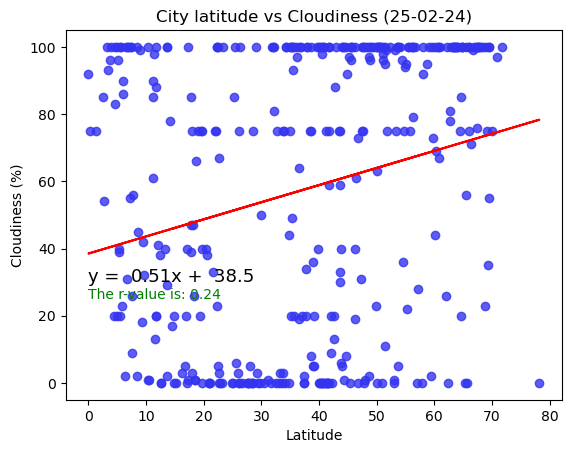

In [101]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#3434F0',alpha=0.8)
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(0,30), fontsize=13, color="black")
plt.text(0,25,f'The r-value is: {round(rvalue,2)}',color= 'green')
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvscloudlrnh.png")

# Show plot
plt.show()

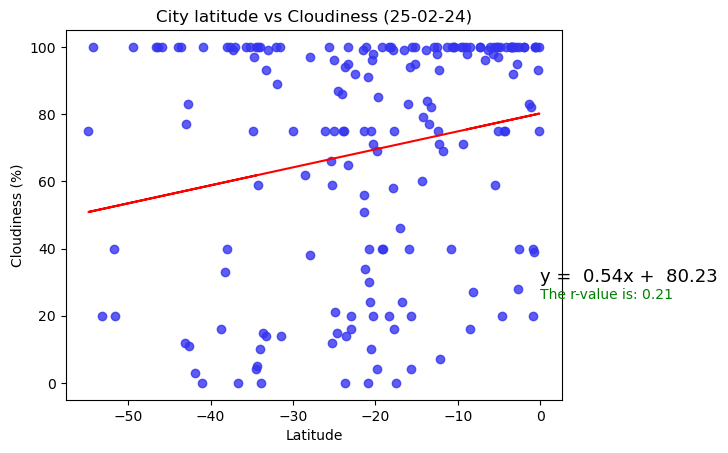

In [102]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#3434F0',alpha=0.8)
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(0,30), fontsize=13, color="black")
plt.text(0,25,f'The r-value is: {round(rvalue,2)}',color= 'green')
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvscloudlrst.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Correlation beetwen these two factros is very weak, latitud it is possible a not main factor vs cloudiness, we need to take a look to another variable.

### Wind Speed vs. Latitude Linear Regression Plot

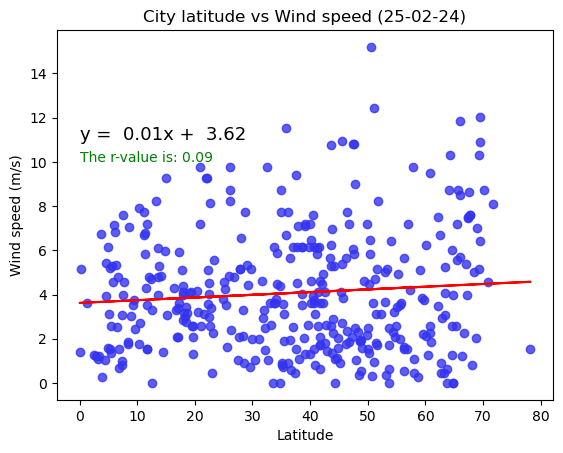

In [103]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#3434F0',alpha=0.8)
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(0,11), fontsize=13, color="black")
plt.text(0,10,f'The r-value is: {round(rvalue,2)}',color= 'green')
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvswindlrnh.png")

# Show plot
plt.show()

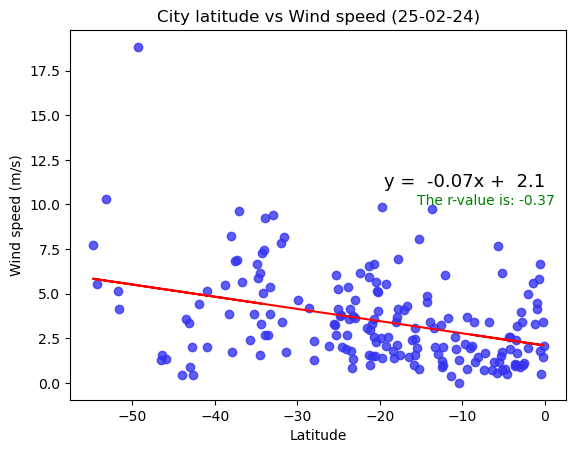

In [104]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#3434F0',alpha=0.8)
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(-19.5,11), fontsize=13, color="black")
plt.text(-15.5,10,f'The r-value is: {round(rvalue,2)}',color= 'green')
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (25-02-24)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvswindlrst.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Not correlation at all, we need more variables to determine the wind correlation.